# Posterior Predictive Analysis for GARCH(1,1) Model

-  Step 1: Simulate hypothetical parameters via from posterior distribution via HMC in Stan

- Step 2: Compute simulated data via the likelihood function, conditional on the simulated parameters (in Stan)

- Step 3: Compare simulated data with observed data to validate model

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\garch


## Read in Real Data

In [27]:
# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)
real_data

,DXY
Date,
1994-04-01,-0.435009
1994-05-01,0.030122
1994-06-01,0.247245
1994-07-01,-0.768186
1994-10-01,0.362673
...,...
2024-03-21,-0.411072
2024-03-22,0.567956
2024-03-25,0.448986


In [28]:
# calculate summary stats on real data: mean, std, skew, kurtosis, min, max, .025, .50, .975 quantiles
summary_stats = real_data.describe(percentiles=[.025, .5, .975])
summary_stats


,DXY
count,7.802000e+03
mean,3.642875e-18
std,4.830342e-01
min,-3.057377e+00
2.5%,-9.959651e-01
50%,-9.449199e-04
97.5%,9.832978e-01
max,2.518960e+00


## Read in Generated Data

In [29]:
# Read in generated data from prior predictive distribution(y_sim_samples)

garch_y_post_path = "sampler_outputs/y_post_samples.csv"
garch_y_post = pd.read_csv(garch_y_post_path)
garch_y_post

,0,1,2,3,4,5,6,7,8,9,...,7792,7793,7794,7795,7796,7797,7798,7799,7800,7801
0,-0.613108,1.359180,-0.190587,-0.974720,0.842250,-1.038090,-0.595588,-0.089657,-1.532080,0.722570,...,-0.013821,-0.611387,-0.566113,0.232747,0.179071,-0.345190,-0.438344,0.429862,-0.029946,-0.439387
1,1.149510,0.784328,-1.534630,-0.522914,-1.238940,-1.102020,-0.523451,0.891549,-0.453816,-0.022247,...,0.282734,0.136656,-0.234511,-1.259780,0.252071,0.266541,-0.067764,0.656391,-0.443251,-0.673278
2,-0.411194,-2.531740,1.292480,0.585684,-0.994395,-0.630870,1.493580,0.617552,0.252720,-0.170582,...,-0.367582,-0.032738,-0.260721,0.578093,-0.100835,0.247031,-0.074308,0.728611,0.219986,0.601786
3,0.450303,0.255977,0.324348,0.835179,-1.149230,1.123590,1.816650,-0.112868,-0.744305,1.520560,...,0.558059,0.170176,0.284609,0.508546,-0.321867,0.289523,-0.069224,-0.111305,-0.080906,0.284531
4,0.420231,0.102839,1.094770,1.931090,2.346600,-0.018265,-0.569951,1.363560,0.041888,-0.236477,...,-0.791523,-0.503664,-0.529544,0.422138,0.085829,-0.682242,-0.317022,-0.160752,0.204943,0.087669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.309292,-1.859740,-1.597470,1.343790,-1.966380,-0.372424,-1.269920,-0.894045,0.455824,0.122295,...,-0.450654,0.050493,0.416405,0.339157,0.520622,-0.090865,0.359899,-0.122189,-0.286585,0.218636
3996,0.367145,-0.398700,-0.623990,-0.087496,-0.278857,-0.753434,0.126175,-0.167631,-0.363381,0.933633,...,0.592754,-0.233339,-0.437625,-0.407590,-0.555243,-0.184709,0.677948,1.056030,0.186529,0.443428
3997,0.906653,0.277705,-0.756984,-0.453357,0.376035,-0.797255,0.358602,-0.520895,0.749881,-0.546332,...,0.597848,-0.388733,-0.018162,0.420087,-0.062123,0.176637,-0.350170,-0.326665,-0.173479,0.342967
3998,1.341840,0.415495,-0.506900,-0.114048,1.273080,-0.461105,0.240265,0.476044,1.877570,-0.960189,...,0.060309,-0.447908,-0.850355,0.338506,0.362978,-0.312711,-0.113935,0.654923,0.777075,0.130881


# Comparison

Statistics for Index 5:
Real Data Mean:  0.2683178773778714
Posterior Data Mean:  0.0052322834480235825
Real Data StdDev:  0.0
Posterior Data StdDev:  0.4838794070251653
Real Data Skewness:  nan
Posterior Data Skewness:  -0.03797686975383445
Real Data Kurtosis:  nan
Posterior Data Kurtosis:  0.46244647055797383




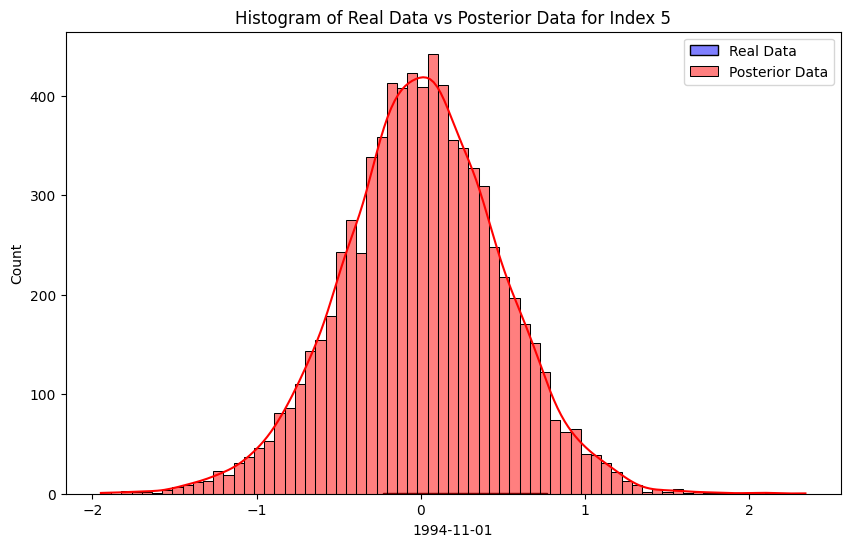

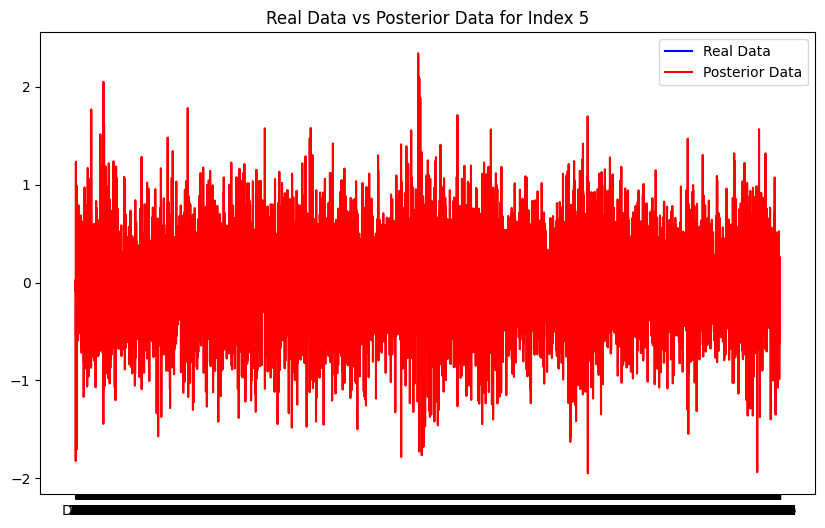

Statistics for Index 1000:
Real Data Mean:  -0.03235031145538718
Posterior Data Mean:  -0.0017003258071007423
Real Data StdDev:  0.0
Posterior Data StdDev:  0.4762908789845333
Real Data Skewness:  nan
Posterior Data Skewness:  -0.013312325284047955
Real Data Kurtosis:  nan
Posterior Data Kurtosis:  0.4417791364439858




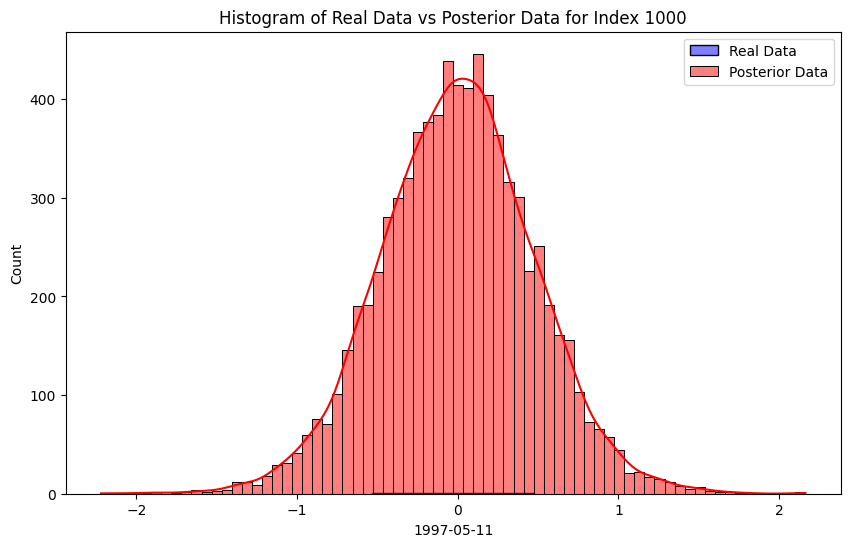

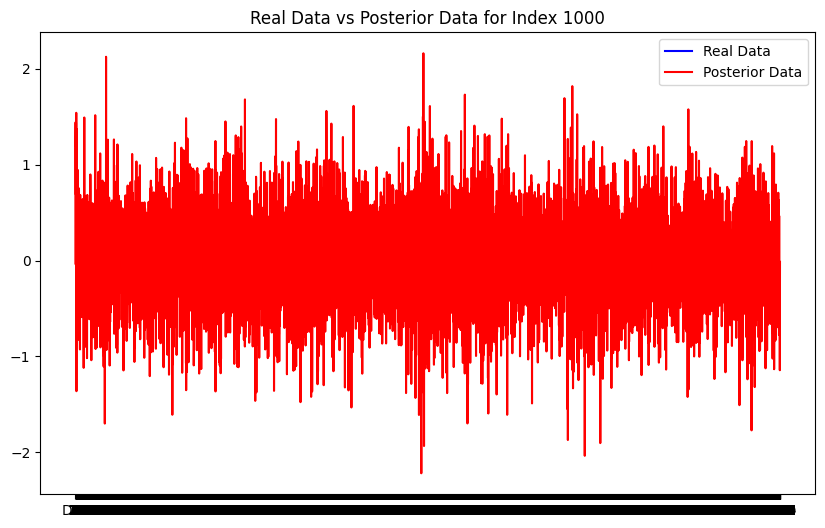

Statistics for Index 2000:
Real Data Mean:  -0.17803014418608268
Posterior Data Mean:  -0.0018024455072071257
Real Data StdDev:  0.0
Posterior Data StdDev:  0.4916439810396097
Real Data Skewness:  nan
Posterior Data Skewness:  0.07356699790466653
Real Data Kurtosis:  nan
Posterior Data Kurtosis:  0.6388319119741435




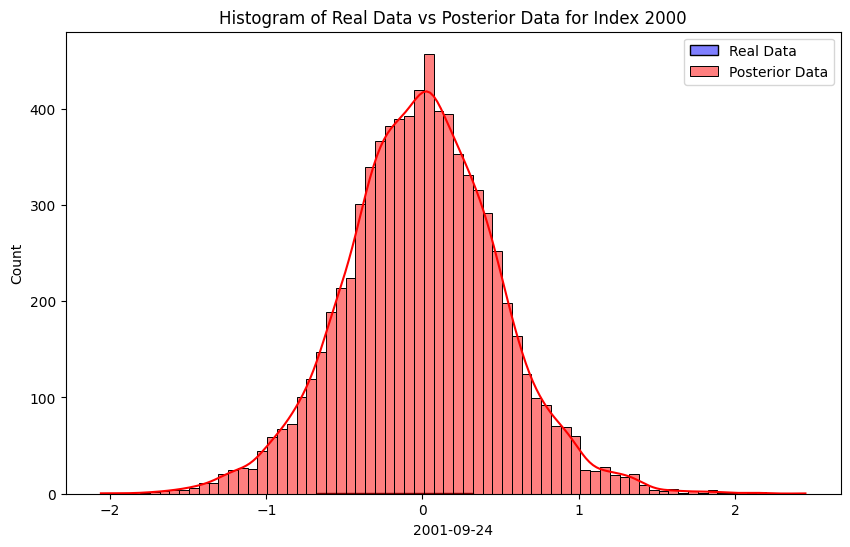

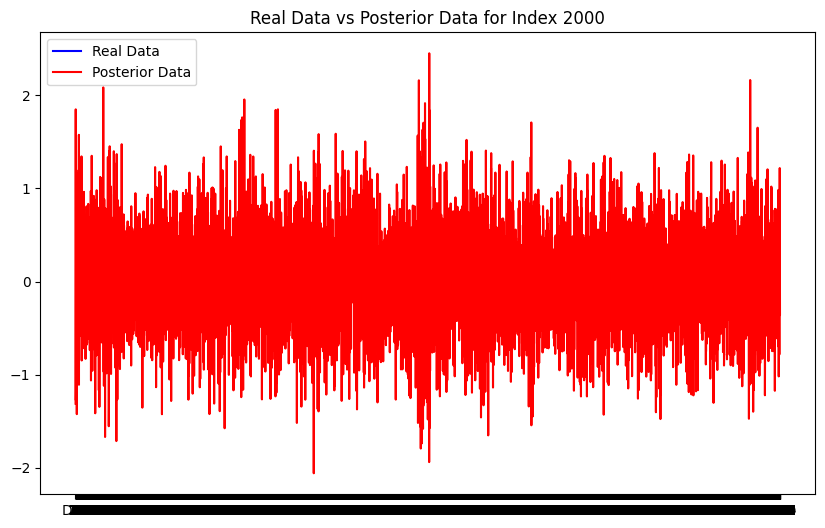

Statistics for Index 3000:
Real Data Mean:  0.6488892086022435
Posterior Data Mean:  0.0072277285418482435
Real Data StdDev:  0.0
Posterior Data StdDev:  0.47917287048750207
Real Data Skewness:  nan
Posterior Data Skewness:  0.030217609241714474
Real Data Kurtosis:  nan
Posterior Data Kurtosis:  0.588029050942215




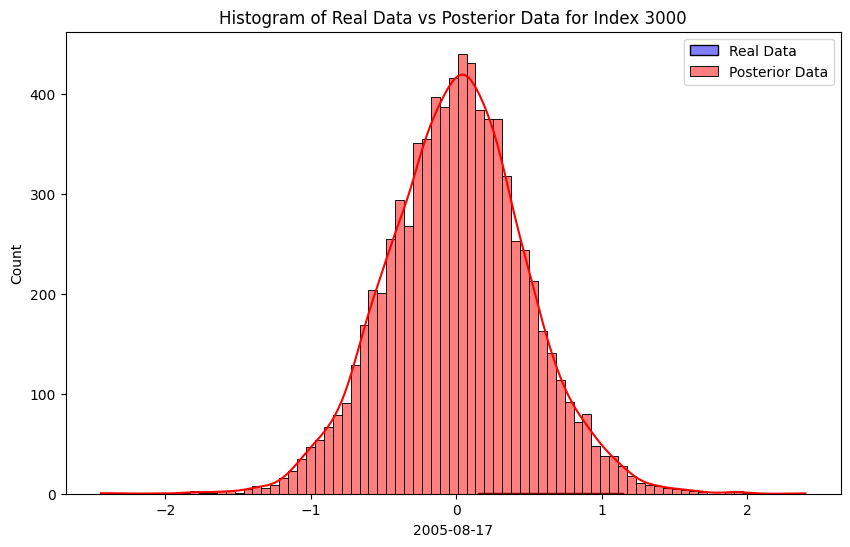

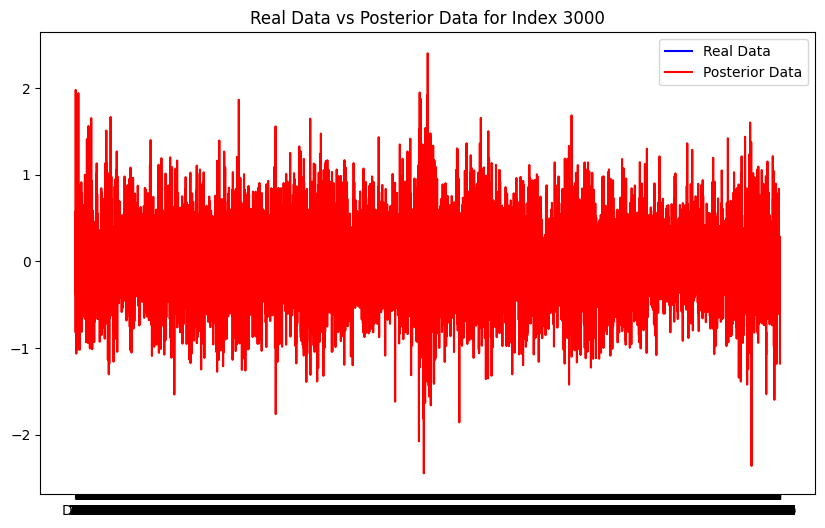

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting indices for detailed comparison, assuming a larger dataset
indices = [5, 2000, 3000]

# Loop through selected indices
for index in indices:
    real_sample = real_data
    post_sample = garch_y_post.iloc[index]

    # Calculate statistics for the current index
    real_mean = np.mean(real_sample)
    real_std = np.std(real_sample)
    real_skew = real_sample.skew()
    real_kurt = real_sample.kurt()

    post_mean = np.mean(post_sample)
    post_std = np.std(post_sample)
    post_skew = post_sample.skew()
    post_kurt = post_sample.kurt()

    # Print statistics
    print(f"Statistics for Index {index}:")
    print("Real Data Mean: ", real_mean)
    print("Posterior Data Mean: ", post_mean)
    print("Real Data StdDev: ", real_std)
    print("Posterior Data StdDev: ", post_std)
    print("Real Data Skewness: ", real_skew)
    print("Posterior Data Skewness: ", post_skew)
    print("Real Data Kurtosis: ", real_kurt)
    print("Posterior Data Kurtosis: ", post_kurt)
    print("\n")

    # Plot histograms for the current index
    plt.figure(figsize=(10, 6))
    sns.histplot(real_sample, kde=True, color='blue', label='Real Data')
    sns.histplot(post_sample, kde=True, color='red', label='Posterior Data')
    plt.title(f"Histogram of Real Data vs Posterior Data for Index {index}")
    plt.legend()
    plt.show()

    # Plot time series for the current index
    plt.figure(figsize=(10, 6))
    plt.plot(real_sample, color='blue', label='Real Data')
    plt.plot(post_sample, color='red', label='Posterior Data')
    plt.title(f"Real Data vs Posterior Data for Index {index}")
    plt.legend()
    plt.show()


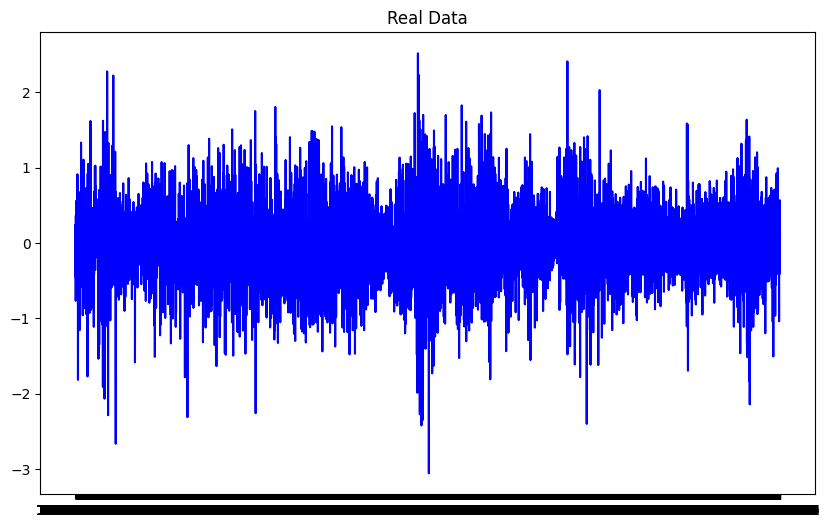

In [31]:
# Plot the real data as a time series
plt.figure(figsize=(10, 6))
plt.plot(real_data, color='blue')
plt.title("Real Data")
plt.show()


In [32]:
garch_y_post.iloc[500]
# real_data.iloc[:,0]

0      -0.208489
1      -1.751910
2       0.669045
3      -0.492424
4      -1.092620
          ...   
7797   -0.609527
7798   -0.109738
7799   -0.059547
7800   -0.205059
7801   -0.072762
Name: 500, Length: 7802, dtype: float64

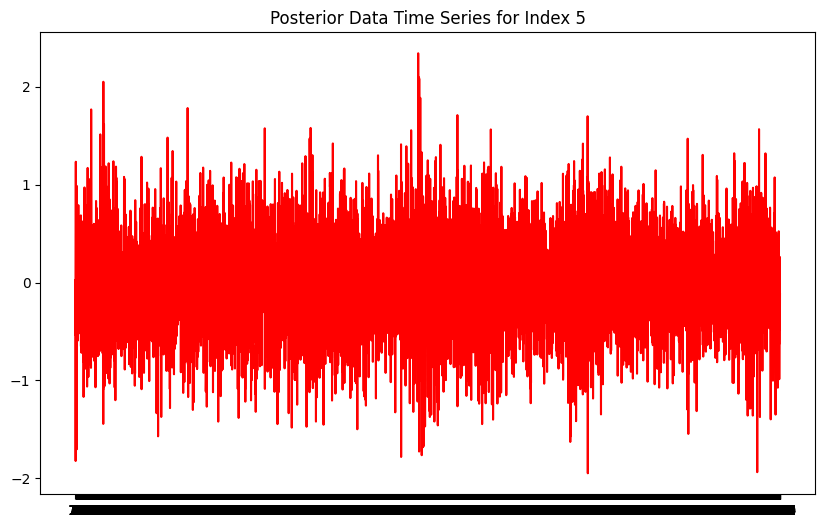

In [33]:
# Plot the posterior data for 3 random indices as a time series
indices = [5]

for index in indices:
    post_sample = garch_y_post.iloc[index]

    plt.figure(figsize=(10, 6))
    plt.plot(post_sample, color='red')
    plt.title(f"Posterior Data Time Series for Index {index}")
    plt.show()
    

Statistics for Index 5:
Real Data Mean:  DXY    3.642875e-18
dtype: float64
Posterior Data Mean:  0.0052322834480235825
Real Data StdDev:  DXY    0.483034
dtype: float64
Posterior Data StdDev:  0.48391041996588136
Real Data Skewness:  DXY   -0.133758
dtype: float64
Posterior Data Skewness:  -0.03797686975383445
Real Data Kurtosis:  DXY    2.023813
dtype: float64
Posterior Data Kurtosis:  0.46244647055797383




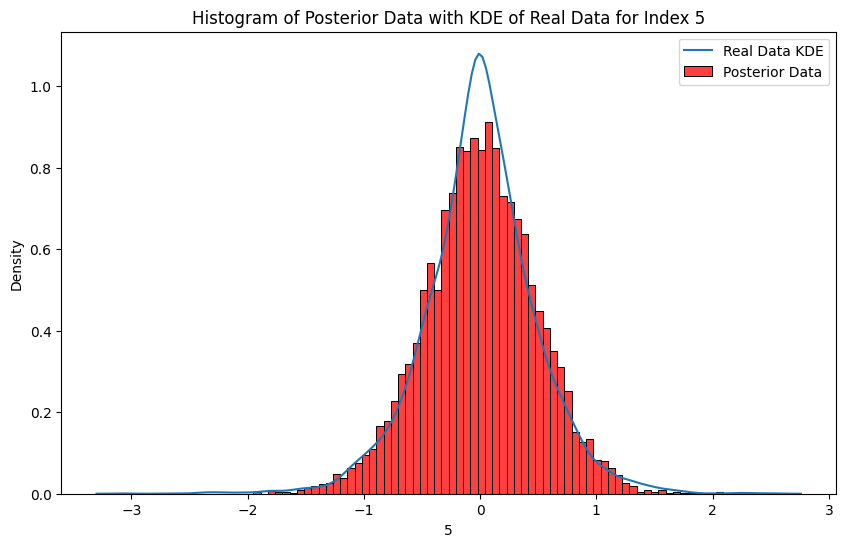

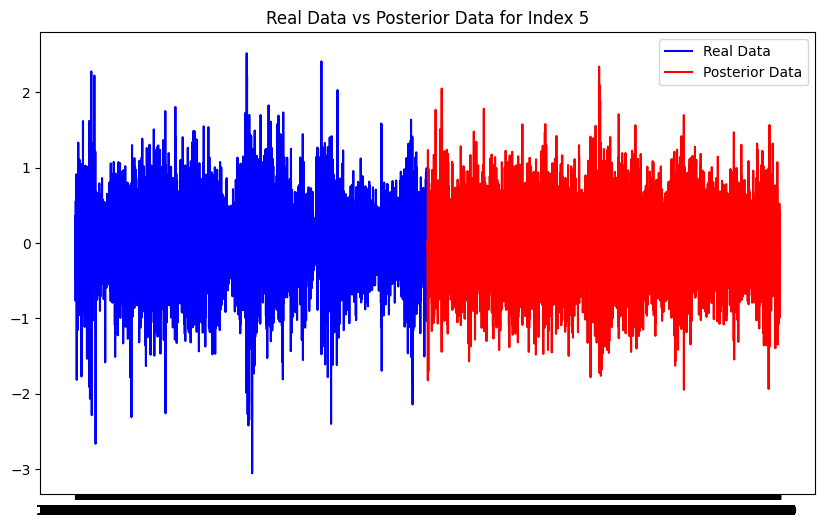

Statistics for Index 3000:
Real Data Mean:  DXY    3.642875e-18
dtype: float64
Posterior Data Mean:  0.0072277285418482435
Real Data StdDev:  DXY    0.483034
dtype: float64
Posterior Data StdDev:  0.4792035817754995
Real Data Skewness:  DXY   -0.133758
dtype: float64
Posterior Data Skewness:  0.030217609241714474
Real Data Kurtosis:  DXY    2.023813
dtype: float64
Posterior Data Kurtosis:  0.588029050942215




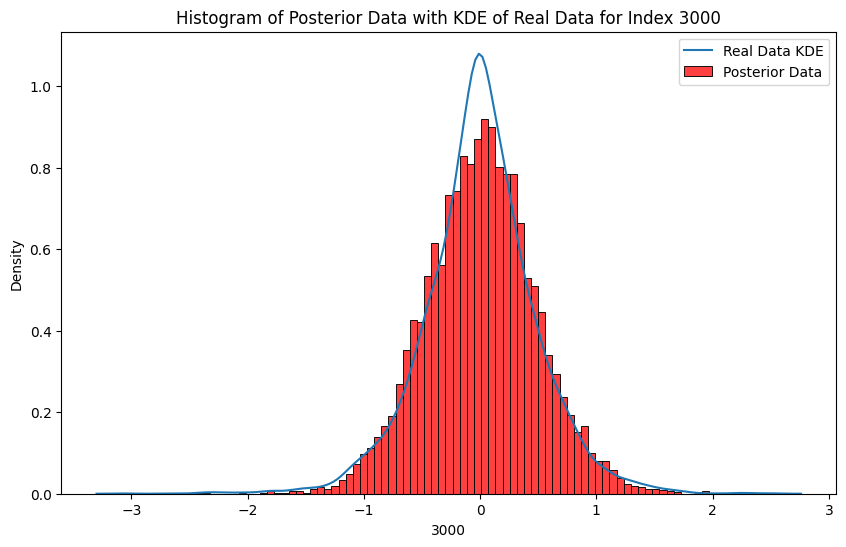

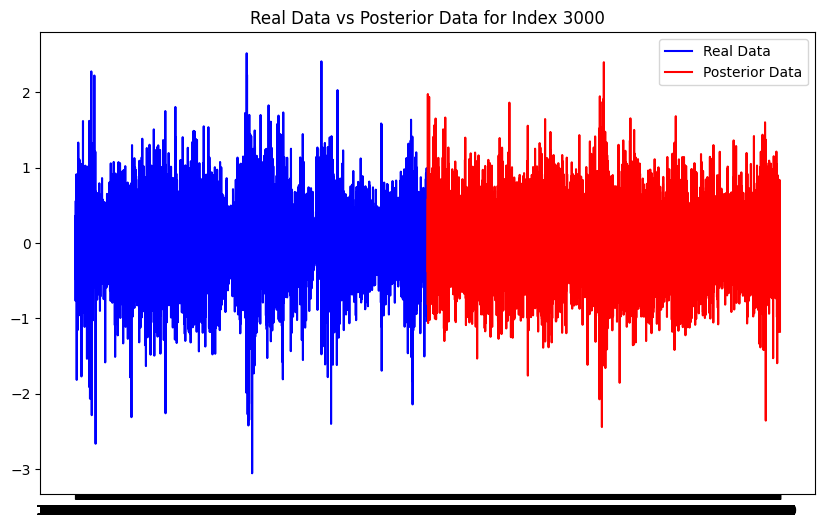

In [38]:
indices = [5, 3000]

for index in indices:
    real_sample = real_data
    post_sample = garch_y_post.iloc[index]

    # Compute statistics
    real_mean = real_sample.mean()
    real_std = real_sample.std()
    real_skew = real_sample.skew()
    real_kurt = real_sample.kurt()

    post_mean = post_sample.mean()
    post_std = post_sample.std()
    post_skew = post_sample.skew()
    post_kurt = post_sample.kurt()

    # Print statistics
    print(f"Statistics for Index {index}:")
    print("Real Data Mean: ", real_mean)
    print("Posterior Data Mean: ", post_mean)
    print("Real Data StdDev: ", real_std)
    print("Posterior Data StdDev: ", post_std)
    print("Real Data Skewness: ", real_skew)
    print("Posterior Data Skewness: ", post_skew)
    print("Real Data Kurtosis: ", real_kurt)
    print("Posterior Data Kurtosis: ", post_kurt)
    print("\n")

    # Plot histograms with KDE for both datasets overlaid
    plt.figure(figsize=(10, 6))
    sns.histplot(post_sample, kde=False, color='red', label='Posterior Data', stat="density")
    sns.kdeplot(real_sample, color='blue', label='Real Data KDE')
    plt.title(f"Histogram of Posterior Data with KDE of Real Data for Index {index}")
    plt.legend()
    plt.show()

    # Plot time series data
    plt.figure(figsize=(10, 6))
    plt.plot(real_sample, color='blue', label='Real Data')
    plt.plot(post_sample, color='red', label='Posterior Data')
    plt.title(f"Real Data vs Posterior Data for Index {index}")
    plt.legend()
    plt.show()